# Regression ile ev fiyatları tahmini

# Predicting house prices using regression

## <font color=red> Receive Data </font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('kc_house_data.csv')

## Eda - Exploraty Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14538,6648150150,20140922T000000,996000.0,3,3.25,3620,8131,2.0,0,0,...,10,2730,890,1988,0,98040,47.5776,-122.214,2040,3776
2400,3336000791,20150407T000000,325000.0,3,1.00,950,4500,1.0,0,0,...,6,950,0,1943,0,98118,47.5273,-122.265,1140,4500
21157,6638900461,20140605T000000,700000.0,3,2.50,2050,4185,2.0,0,0,...,9,2050,0,2011,0,98117,47.6922,-122.371,1150,5000
9240,2402100205,20141119T000000,412133.0,2,1.00,920,4400,1.0,0,0,...,7,920,0,1948,0,98103,47.6903,-122.332,1560,4600
725,2473400340,20140604T000000,320000.0,3,1.50,1650,9380,1.0,0,0,...,7,1130,520,1978,0,98058,47.4525,-122.162,1720,8856


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.corr()
# hypothesis testing - p - Value<0.05

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [8]:
abs(df.corr()['price']).sort_values(ascending=False)#The percentage impact of other columns on 'price'.

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

### Data Visualization

<AxesSubplot: >

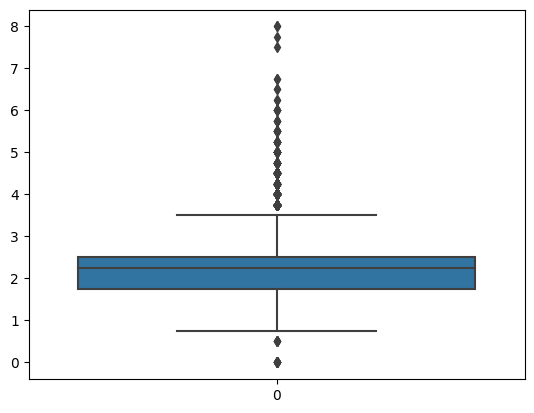

In [9]:
sns.boxplot(df['bathrooms'])

<AxesSubplot: ylabel='count'>

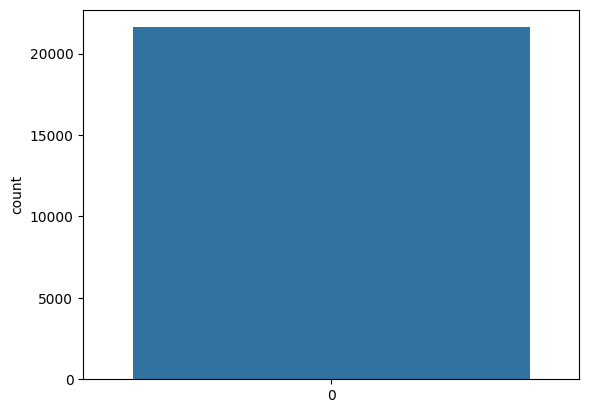

In [10]:
sns.countplot(df['bedrooms'])

<AxesSubplot: xlabel='sqft_living', ylabel='Density'>

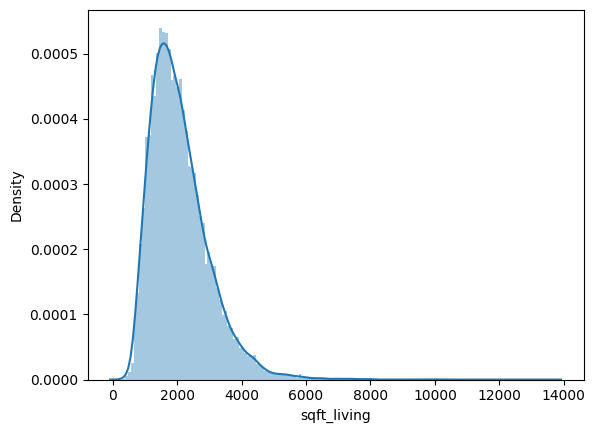

In [11]:
sns.distplot(df['sqft_living'], bins=150, kde=True)

<AxesSubplot: xlabel='sqft_above', ylabel='Density'>

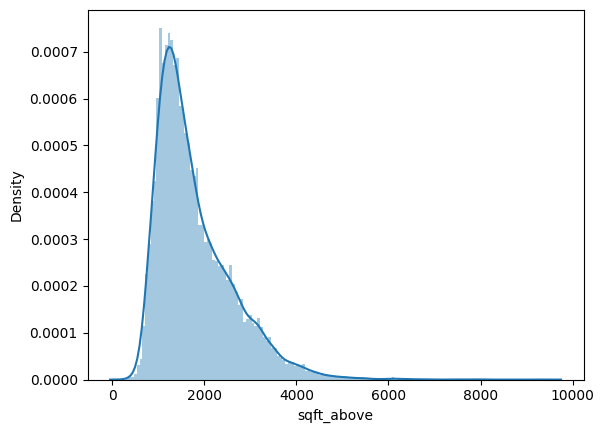

In [12]:
sns.distplot(df['sqft_above'], bins=150, kde=True)

<AxesSubplot: xlabel='sqft_living15', ylabel='Density'>

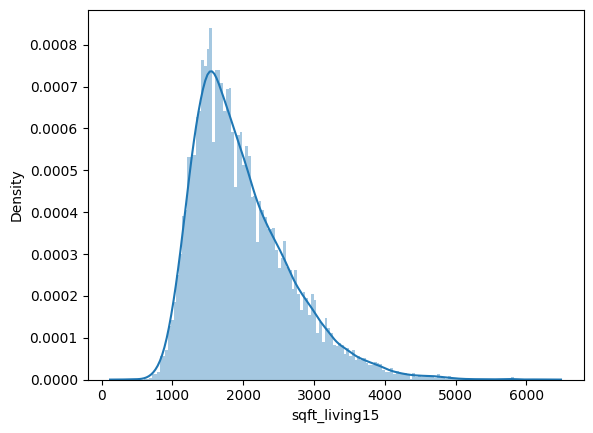

In [13]:
sns.distplot(df['sqft_living15'], bins=150, kde=True)

<AxesSubplot: xlabel='sqft_basement', ylabel='Density'>

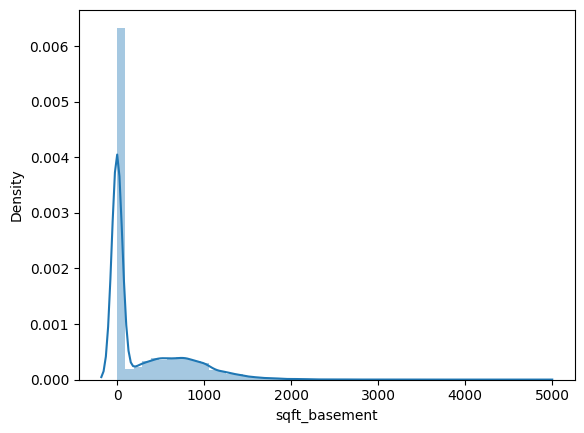

In [14]:
sns.distplot(df['sqft_basement'], bins=50, kde=True)

<AxesSubplot: >

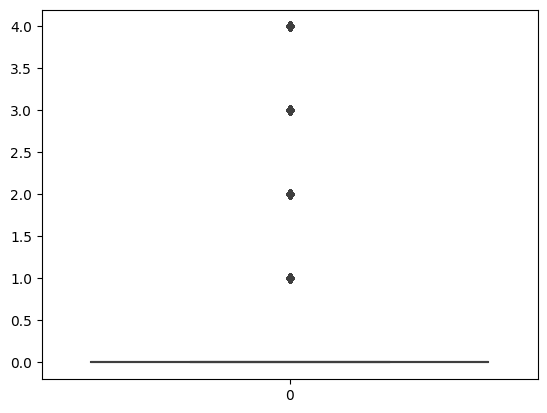

In [15]:
sns.boxplot(df['view'])


<AxesSubplot: >

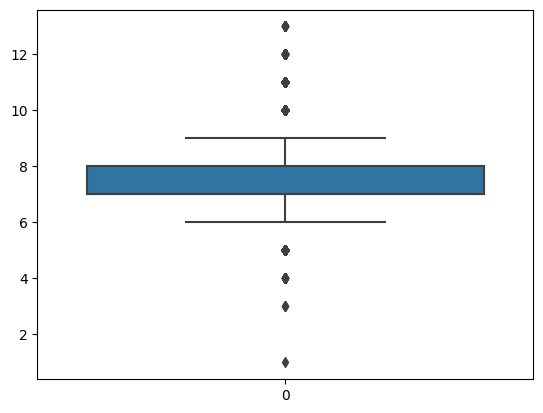

In [16]:
sns.boxplot(df['grade'])

### Data Preprocessing

In [17]:
df['grade'].value_counts()#How many times do different data values occur

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [18]:
df['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [19]:
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: sqft_living, Length: 1038, dtype: int64

In [20]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [21]:
df["zipcode"]=df['zipcode'].astype('category')#zipcode converted to category.

In [22]:
df['age']=2021-df['yr_built']#found the age of the building by subtracting the construction year from the current year.

In [23]:
#Outliers were removed, and the influence of identified columns was enhanced.

In [24]:
df=df[df['bathrooms']<10]
df['bathrooms']=df['bathrooms']**2

In [25]:
df=df[df['bedrooms']<10]
df['bedrooms']=df['bedrooms']**2

In [26]:
df=df[df['price']<(df['price'].mean()+3*df['price'].std()+1)]

In [27]:
df=df[df['sqft_living']<5000]
df=df[df['sqft_living15']<4000]               

In [28]:
df['basement']=np.where(df['sqft_basement']>0,1,0)

In [29]:
df=df[df['view']==0]

In [30]:
abs(df.corr()['price']).sort_values(ascending=False)

price            1.000000
grade            0.640441
sqft_living      0.629882
sqft_above       0.547850
sqft_living15    0.540925
bathrooms        0.466199
lat              0.422649
bedrooms         0.302867
floors           0.289169
sqft_basement    0.202871
basement         0.136096
sqft_lot         0.087845
yr_renovated     0.079478
sqft_lot15       0.075519
long             0.068069
yr_built         0.065296
age              0.065296
condition        0.036334
id               0.002419
waterfront            NaN
view                  NaN
Name: price, dtype: float64

<AxesSubplot: >

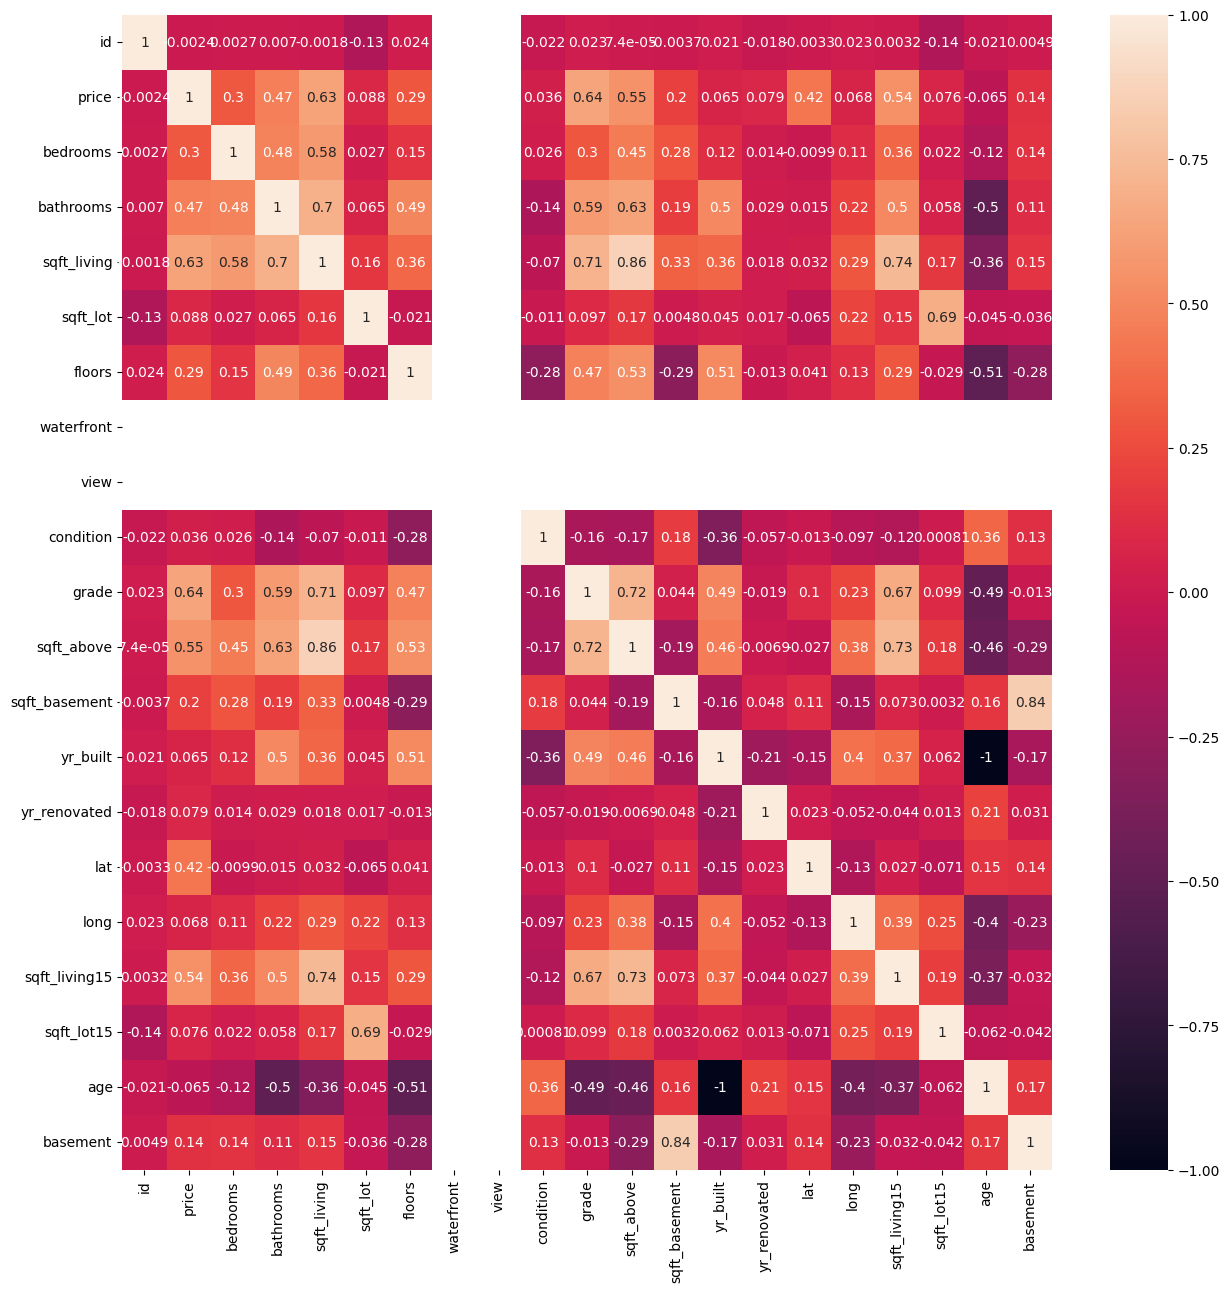

In [31]:
ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

## Model training and testing.

In [32]:
x, y=df[['lat','sqft_living15','sqft_living','grade','sqft_above','bathrooms','view','basement','bedrooms','waterfront','floors','zipcode','age','condition',]],df[['price']]

In [33]:
x=pd.get_dummies(x,drop_first=(True))#"The get_dummies function is used to convert categorical variables into binary (dummy) variables."

In [34]:
x.sample(5)

,lat,sqft_living15,sqft_living,grade,sqft_above,bathrooms,view,basement,bedrooms,waterfront,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
574,47.4478,1330,1330,7,1040,3.0625,0,1,9,0,...,0,0,0,0,0,0,0,0,0,0
4021,47.4519,2310,2450,8,2450,5.0625,0,0,25,0,...,0,0,0,0,0,0,0,0,0,0
10672,47.7412,1970,1970,8,1570,6.2500,0,1,25,0,...,0,0,0,0,0,0,0,0,0,0
15110,47.2840,2100,1600,7,1600,3.0625,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0
4076,47.7512,1640,1660,7,1660,3.0625,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
x.describe()

,lat,sqft_living15,sqft_living,grade,sqft_above,bathrooms,view,basement,bedrooms,waterfront,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
count,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19159.0,19159.000000,19159.000000,19159.0,...,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000
mean,47.558830,1895.031160,1952.945143,7.516624,1707.098596,4.675035,0.0,0.359935,11.839919,0.0,...,0.012892,0.002975,0.021609,0.009656,0.013936,0.009186,0.010752,0.006681,0.011065,0.012266
std,0.140937,596.232279,757.940262,1.043386,727.330885,3.059781,0.0,0.479994,6.356637,0.0,...,0.112812,0.054465,0.145406,0.097792,0.117228,0.095406,0.103136,0.081466,0.104611,0.110073
min,47.155900,460.000000,290.000000,1.000000,290.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.461550,1458.500000,1380.000000,7.000000,1170.000000,2.250000,0.0,0.000000,9.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.570600,1780.000000,1830.000000,7.000000,1510.000000,4.000000,0.0,0.000000,9.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.680900,2240.000000,2410.000000,8.000000,2110.000000,6.250000,0.0,1.000000,16.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,47.777600,3990.000000,4960.000000,12.000000,4930.000000,56.250000,0.0,1.000000,81.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [37]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)#To split the data into training and testing sets.

### LinearRegression

In [38]:
LR=LinearRegression()
LR.fit(x_train,y_train)
predict_lr=LR.predict(x_test)#It predicts using the predict function.
predict_lr

array([[511532.00432991],
       [412648.27442293],
       [862807.93049776],
       ...,
       [513997.61792869],
       [139200.70114521],
       [510216.7410062 ]])

In [39]:
(mean_squared_error(y_test,predict_lr))**0.5 #Mean Squared Error

96307.46250646123

In [40]:
r2_score(y_test,predict_lr)#Accuracy rate

0.8199563504279813

In [41]:
print(LR.coef_)

[[ 1.64168782e+05  2.37674795e+01  7.94795820e+01  4.93076239e+04
   5.71446592e+01  5.48818314e+03 -1.69648297e+14  9.61820873e+02
  -1.40921140e+03  3.64723127e+13 -2.50328320e+04  6.57562500e+02
   2.17663203e+04  1.04948848e+04 -5.06613477e+03  5.51031500e+05
   2.80857861e+05  2.16390602e+05  1.99353599e+05  1.76675270e+05
   9.34892275e+04  6.93092979e+04  7.09112363e+04  2.79295039e+04
   3.22453027e+04 -2.19490938e+04  1.16736033e+05  1.52373257e+05
   5.51065078e+04  1.77361037e+05 -8.84250488e+03 -4.36165527e+03
  -5.76325781e+03  2.76030555e+05  1.12130375e+05  2.79561836e+04
   7.12107472e+05  4.29679131e+05  8.28710938e+00  8.63224912e+04
   1.81761873e+05  1.66434203e+05  1.51618848e+04  6.40848989e+04
   1.29129111e+04  6.32638809e+04  8.65802310e+04  1.48039748e+05
   1.02839184e+05  1.48102980e+05  1.67457994e+05  9.43113955e+04
  -1.51902734e+04  3.82778672e+05  2.60354549e+05  3.55550763e+05
   8.62226660e+04  2.65271021e+05  7.55088549e+04  3.94252520e+05
   4.65839

### Ridge ve Laso

In [42]:
R=Ridge()
R.fit(x_train,y_train)
predict_ridge=R.predict(x_test)

In [43]:
(mean_squared_error(y_test,predict_ridge))**0.5 #Mean Squared Error

96523.09010771212

In [44]:
r2_score(y_test,predict_ridge)#Accuracy rate

0.8191492303990251

In [45]:
L=Lasso()
L.fit(x_train,y_train)
predict_lasso=L.predict(x_test)

In [46]:
(mean_squared_error(y_test,predict_lasso))**0.5 #Mean Squared Error

96316.2921462104

In [47]:
r2_score(y_test,predict_lasso)#Accuracy rate

0.819923335469479

### RandomForestRegressor

In [48]:
r=RandomForestRegressor()
r.fit(x_train,y_train)
predict_rfr=r.predict(x_test)

In [49]:
(mean_squared_error(y_test,predict_rfr))**0.5 #Mean Squared Error

89873.30445661278

In [50]:
r2_score(y_test,predict_rfr)#Accuracy rate

0.8432096435906349

### GradientBoostingRegressor

In [51]:
g=GradientBoostingRegressor()
g.fit(x_train,y_train)
predict_gbr=g.predict(x_test)

In [52]:
(mean_squared_error(y_test,predict_gbr))**0.5 #Mean Squared Error

91488.56010443295

In [53]:
r2_score(y_test,predict_gbr)#Accuracy rate

0.8375231419673527

In [54]:
#As a result, the mean squared error (MSE) was found to be below 100k, and the accuracy rate was above 80%.